In [1]:
from graph_embedding.dmon.train import *

2024-05-07 16:51:13.475499: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-07 16:51:13.892114: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 16:51:13.892208: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 16:51:13.952903: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-07 16:51:14.066191: I tensorflow/core/platform/cpu_feature_guar

In [10]:
adjacency, features, labels, label_indices = load_npz('graph_embedding/dmon/data/cora.npz')

In [20]:
matrix = adjacency.tocoo()

In [22]:
matrix.data

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
features = features.todense()
n_nodes = adjacency.shape[0]
feature_size = features.shape[1]
graph = convert_scipy_sparse_to_sparse_tensor(adjacency)

2024-05-03 11:53:17.855978: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-03 11:53:18.092362: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-03 11:53:18.093363: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [15]:
graph_normalized = convert_scipy_sparse_to_sparse_tensor(
      utils.normalize_graph(adjacency.copy()))

In [16]:
graph_normalized

SparseTensor(indices=tf.Tensor(
[[   0    0]
 [   0  633]
 [   0 1862]
 ...
 [2707 1473]
 [2707 2706]
 [2707 2707]], shape=(13264, 2), dtype=int64), values=tf.Tensor([0.25      0.25      0.2236068 ... 0.2       0.2       0.2      ], shape=(13264,), dtype=float32), dense_shape=tf.Tensor([2708 2708], shape=(2,), dtype=int64))

In [2]:
import numpy as np
import scipy.sparse

In [10]:
with np.load(open('graph_embedding/dmon/data/cora.npz', 'rb'), allow_pickle=True) as loader:
    for key in loader.files:
        print(key)
        # print(loader[key])

labels
label_indices
feature_data
feature_indices
feature_indptr
feature_shape
adj_data
adj_indices
adj_indptr
adj_shape


These keys correspond to the different components of the graph and its associated data stored in the `cora.npz` file:

1. `labels`: This is likely a dense array of labels for the nodes in the graph. Each label could represent a class or category to which a node belongs.

2. `label_indices`: This is likely the indices of the nodes that have these labels. It maps each label to the corresponding node in the graph.

3. `feature_data`: This is the data for the feature matrix. In the context of a graph, features often represent some attributes or properties of the nodes.

4. `feature_indices`: This is the indices where the `feature_data` will be inserted in the feature matrix.

5. `feature_indptr`: This is the index pointers for the feature matrix. It is used in conjunction with `feature_indices` to construct the sparse matrix.

6. `feature_shape`: This represents the shape of the feature matrix. It's a tuple that indicates the number of rows (nodes) and columns (features) in the feature matrix.

7. `adj_data`: This is the data for the adjacency matrix of the graph. In an adjacency matrix, the entry in the ith row and jth column is equal to the number of edges between vertices i and j.

8. `adj_indices`: This is the indices where the `adj_data` will be inserted in the adjacency matrix.

9. `adj_indptr`: This is the index pointers for the adjacency matrix. It is used in conjunction with `adj_indices` to construct the sparse matrix.

10. `adj_shape`: This represents the shape of the adjacency matrix. It's a tuple that indicates the number of rows and columns in the adjacency matrix, which should both be equal to the number of nodes in the graph.

In [12]:

# Create some arrays
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
arr3 = np.array([7, 8, 9])

# Save the arrays to a .npz file
np.savez('arrays.npz', arr1=arr1, arr2=arr2, arr3=arr3)

In [14]:
with np.load('arrays.npz') as data:
    print(data.files)

['arr1', 'arr2', 'arr3']


In [15]:
import numpy as np
import scipy.sparse

# Create a simple adjacency matrix for a graph with 3 nodes
# Nodes 1 and 2 are connected, and nodes 2 and 3 are connected
adjacency = scipy.sparse.csr_matrix([[0, 1, 0], [1, 0, 1], [0, 1, 0]])

# Create a simple feature matrix where each node has a 2-dimensional feature vector
features = scipy.sparse.csr_matrix([[1, 2], [3, 4], [5, 6]])

# Create labels for the nodes and the corresponding label indices
labels = np.array([0, 1, 0])  # Node 1 and 3 belong to class 0, node 2 belongs to class 1
label_indices = np.array([0, 1, 2])  # The labels correspond to nodes 1, 2, and 3

# Save the data to a .npz file
np.savez('graph.npz', 
         adj_data=adjacency.data, 
         adj_indices=adjacency.indices, 
         adj_indptr=adjacency.indptr, 
         adj_shape=adjacency.shape,
         feature_data=features.data, 
         feature_indices=features.indices, 
         feature_indptr=features.indptr, 
         feature_shape=features.shape,
         labels=labels, 
         label_indices=label_indices)

In [21]:
import numpy as np
import scipy.sparse

# Load the Cora dataset
data = np.load('graph_embedding/dmon/data/cora.npz')

# The adjacency matrix is stored as a sparse CSR matrix
adjacency = scipy.sparse.csr_matrix((data['adj_data'], data['adj_indices'], data['adj_indptr']), shape=data['adj_shape'])

# The feature matrix is also stored as a sparse CSR matrix
features = scipy.sparse.csr_matrix((data['feature_data'], data['feature_indices'], data['feature_indptr']), shape=data['feature_shape'])

# The labels are stored as a numpy array
labels = data['labels']

# Print the number of nodes, features, and labels
print(f'Number of nodes: {adjacency.shape[0]}')
print(f'Number of features: {features.shape[1]}')
print(f'Number of labels: {np.unique(labels).size}')

Number of nodes: 2708
Number of features: 1433
Number of labels: 7


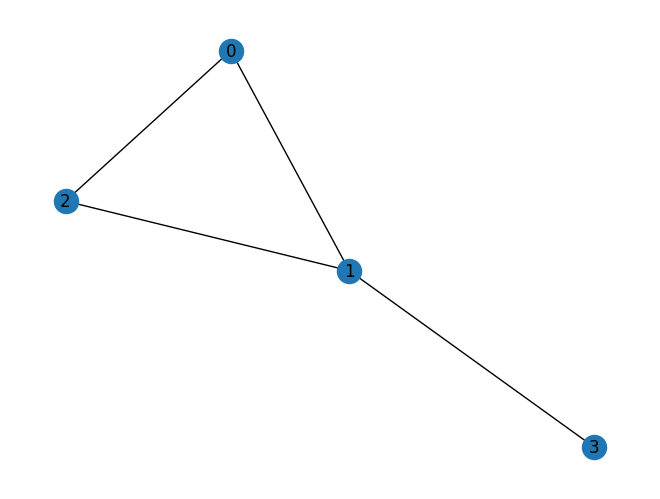

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create an adjacency matrix for a graph with 4 nodes
# Node 1 is connected to Node 2 and Node 3
# Node 2 is connected to Node 3 and Node 4
# Node 3 is not connected to Node 4
adjacency = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 0],
    [0, 1, 0, 0]
])

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(adjacency)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

In [6]:
with np.load('graph.npz') as data:
    print(data['adj_data'])
    # G = nx.from_numpy_array(data['adj_data'])

    # # Draw the graph
    # nx.draw(G, with_labels=True)
    # plt.show()

[1 1 1 1]


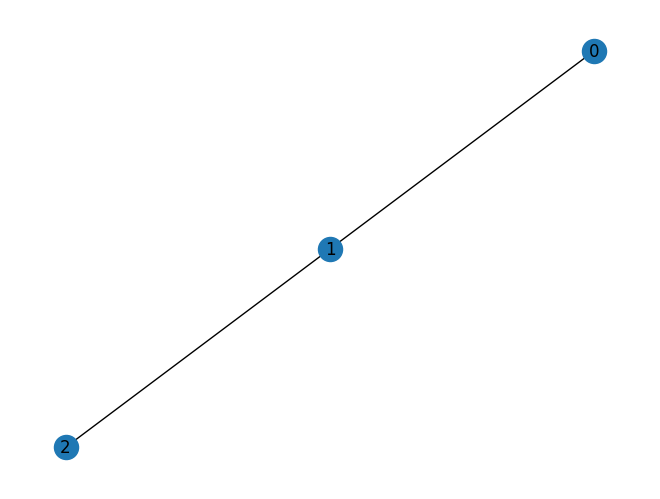

In [8]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

# Load the data from the .npz file
data = np.load('graph.npz')

# Create the adjacency matrix from the loaded data
adjacency = csr_matrix((data['adj_data'], data['adj_indices'], data['adj_indptr']), shape=data['adj_shape'])

# Create a graph from the adjacency matrix
G = nx.from_scipy_sparse_array(adjacency)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

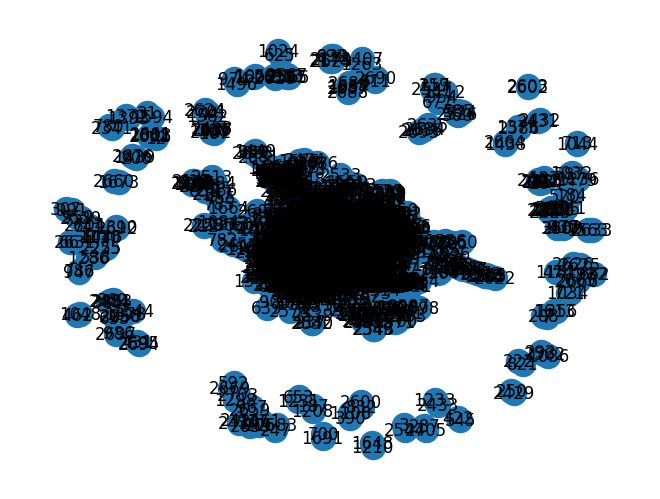

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

# Load the data from the .npz file
data = np.load('graph_embedding/dmon/data/cora.npz')

# Create the adjacency matrix from the loaded data
adjacency = csr_matrix((data['adj_data'], data['adj_indices'], data['adj_indptr']), shape=data['adj_shape'])

# Create a graph from the adjacency matrix
G = nx.from_scipy_sparse_array(adjacency)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()


In [2]:
import networkx as nx
import numpy as np

# Create a directed graph
G = nx.DiGraph()

# Add nodes. In the Cora dataset, nodes represent documents.
documents = ['doc1', 'doc2', 'doc3', 'doc4', 'doc5']
for doc in documents:
    G.add_node(doc)

# Add edges. In the Cora dataset, edges represent citations.
citations = [('doc1', 'doc2'), ('doc2', 'doc3'), ('doc3', 'doc4'), ('doc4', 'doc5'), ('doc5', 'doc1')]
G.add_edges_from(citations)

# Add node features. In the Cora dataset, these are binary word vectors.
for node in G.nodes():
    G.nodes[node]['feature'] = np.random.rand(10)

# Add labels. In the Cora dataset, these represent the document's research field.
labels = ['AI', 'ML', 'DS', 'CV', 'NLP']
for i, node in enumerate(G.nodes()):
    G.nodes[node]['label'] = labels[i % len(labels)]

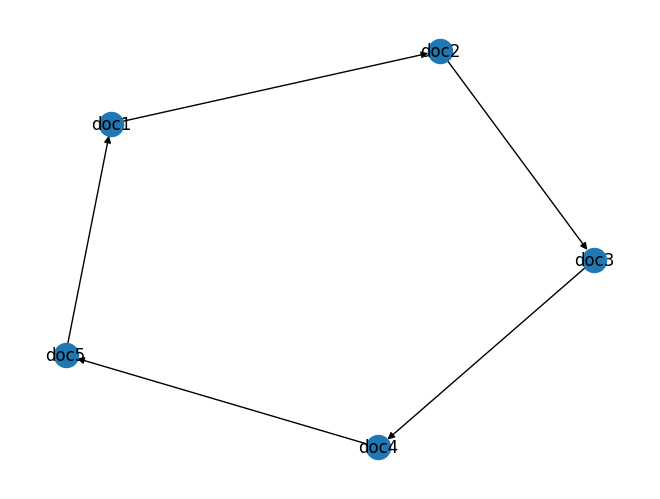

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()


Number of nodes: 2708
Number of edges: 5278
Number of features: 1433
Number of labels: 7


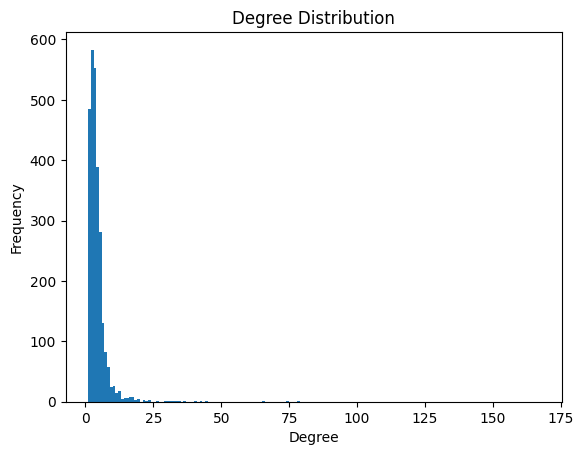

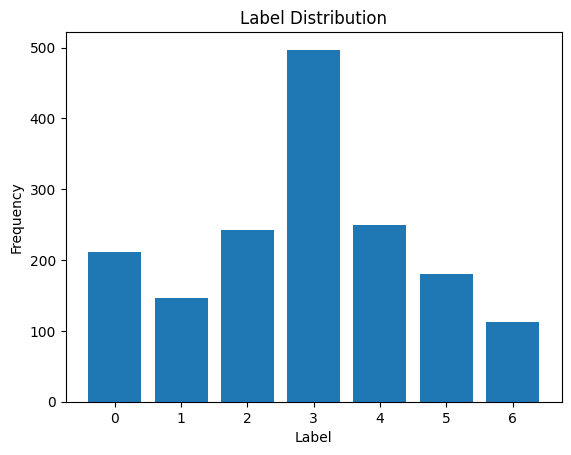

In [22]:
import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt
import networkx as nx

# Load the Cora dataset
data = np.load('graph_embedding/dmon/data/cora.npz')

# The adjacency matrix is stored as a sparse CSR matrix
adjacency = scipy.sparse.csr_matrix((data['adj_data'], data['adj_indices'], data['adj_indptr']), shape=data['adj_shape'])

# The feature matrix is also stored as a sparse CSR matrix
features = scipy.sparse.csr_matrix((data['feature_data'], data['feature_indices'], data['feature_indptr']), shape=data['feature_shape'])

# The labels are stored as a numpy array
labels = data['labels']

# Convert the adjacency matrix to a NetworkX graph
G = nx.from_scipy_sparse_array(adjacency)

# Print the number of nodes, edges, features, and labels
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')
print(f'Number of features: {features.shape[1]}')
print(f'Number of labels: {np.unique(labels).size}')

# Plot the degree distribution
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees, bins=range(1, np.max(degrees)))
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

# Plot the label distribution
plt.hist(labels, bins=np.arange(labels.min(), labels.max()+2)-0.5, rwidth=0.8)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(np.unique(labels))
plt.show()

The degree of a node in a graph is the number of edges connected to it. In the context of the Cora dataset, the degree of a node (a scientific paper) is the number of citations it has (incoming edges) plus the number of papers it cites (outgoing edges).

The degree distribution of a graph is a probability distribution of the degrees over the entire network. It gives us an understanding of how the edges in the network are distributed among the nodes. For example, in some networks, most nodes have roughly the same degree, while in others (like many real-world social networks), there are a few nodes with a very high degree and many nodes with a low degree. This latter type of network is often called a "scale-free" network.

In the context of the Cora dataset, the degree distribution can give us insights into the citation patterns among the papers. For example, it can tell us whether there are a few papers that are cited very often, or whether citations are more evenly distributed among papers.

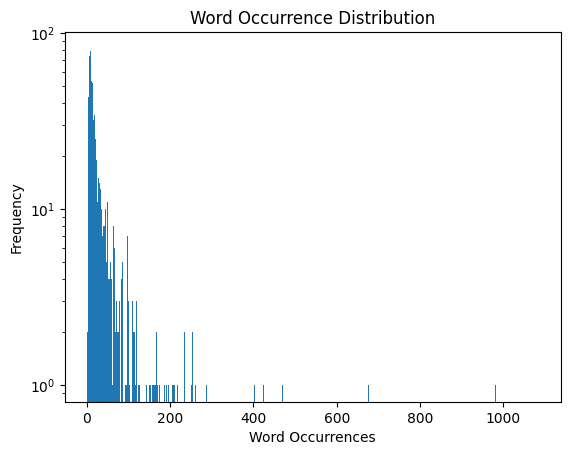

In [12]:
# Compute the sum of each column of the feature matrix
# This gives us the total occurrence of each word across all documents
word_counts = np.array(features.sum(axis=0)).flatten()

# Plot the distribution of word occurrences
plt.hist(word_counts, bins=range(1, int(np.max(word_counts))+1), log=True)
plt.title('Word Occurrence Distribution')
plt.xlabel('Word Occurrences')
plt.ylabel('Frequency')
plt.show()

In [25]:
for i in data['label_indices']:
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [26]:
for i in data['labels']:
    print(i)

3
4
4
0
3
2
0
3
3
2
0
0
4
3
3
3
2
3
1
3
5
3
4
6
3
3
6
3
2
4
3
6
0
4
2
0
1
5
4
4
3
6
6
4
3
3
2
5
3
4
5
3
0
2
1
4
6
3
2
2
0
0
0
4
2
0
4
5
2
6
5
2
2
2
0
4
5
6
4
0
0
0
4
2
4
1
4
6
0
4
2
4
6
6
0
0
6
5
0
6
0
2
1
1
1
2
6
5
6
1
2
2
1
5
5
5
6
5
6
5
5
1
6
6
1
5
1
6
5
5
5
1
5
1
1
1
1
1
1
1
4
3
0
3
6
6
0
3
4
0
3
4
4
1
2
2
2
3
3
3
3
0
4
5
0
3
4
3
3
3
2
3
3
2
2
6
1
4
3
3
3
6
3
3
3
3
0
4
2
2
6
5
3
5
4
0
4
3
4
4
3
3
2
4
0
3
2
3
3
4
4
0
3
6
0
3
3
4
3
3
5
2
3
2
4
1
3
2
2
3
3
3
3
5
1
3
1
3
5
0
3
5
0
4
2
4
2
4
4
5
4
3
5
3
3
4
3
0
4
5
0
3
6
2
5
5
5
3
2
3
0
4
5
3
0
4
0
3
3
0
0
3
5
4
4
3
4
3
3
2
2
3
0
3
1
3
2
3
3
4
5
2
1
1
0
0
1
6
1
3
3
3
2
3
3
0
3
4
1
3
4
3
2
0
0
4
2
3
2
1
4
6
3
2
0
3
3
2
3
4
4
2
1
3
5
3
2
0
4
5
1
3
3
2
0
2
4
2
2
2
5
4
4
2
2
0
3
2
4
4
5
5
1
0
3
4
5
3
4
5
3
4
3
3
1
4
3
3
5
2
3
2
5
5
4
3
3
3
3
1
5
3
3
2
6
0
1
3
0
1
5
3
6
3
6
0
3
3
3
5
4
3
4
0
5
2
1
2
4
4
4
4
3
3
0
4
3
0
5
2
0
5
4
4
4
3
0
6
5
2
4
5
1
3
5
3
0
3
5
1
1
0
3
4
2
6
2
0
5
3
4
6
5
3
5
0
1
3
0
5
2
2
3
5
1
0
3
1
4
2
5
6
4
2
2
6
0
0
4
6
